# 决策树与随机森林
## 决策树
决策树是一种在分类与回归中都非常广泛应用的算法，其原理是通过一系列的问题进行if-else推导，最终实现决策。
### 决策树的基本原理
读心术游戏：出题者在心中默想一个人或者事物，提问者一共只能提20个问题，出题者回答是或者否，猜出答案则赢得游戏。
### 决策树的优点
能处理很多复杂的数据类型


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split

In [2]:
# 红酒数据集
wine = datasets.load_wine()
# 为了方便演示，只导入前两个特征
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=8)

In [3]:
#建立模型
clf = tree.DecisionTreeClassifier(max_depth=10,random_state=3)
# 显示决策树的参数
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=3)

In [4]:
clf.score(X_test, y_test)

0.7555555555555555

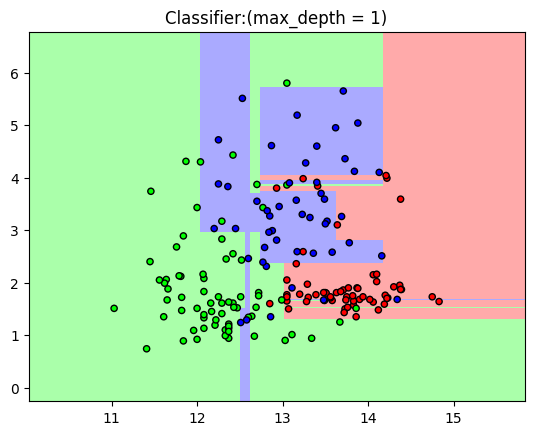

In [5]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 1)")

plt.show()

In [6]:
clf2 = tree.DecisionTreeClassifier(max_depth=10, random_state = 3)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=3)

In [7]:
clf2.score(X_test, y_test)

0.7555555555555555

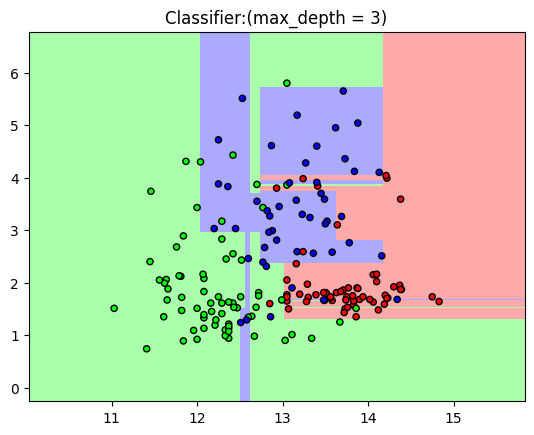

In [8]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 3)")

plt.show()

In [9]:
clf3 = tree.DecisionTreeClassifier(max_depth=100)
clf3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=100)

In [10]:
clf3.score(X_test, y_test)

0.7333333333333333

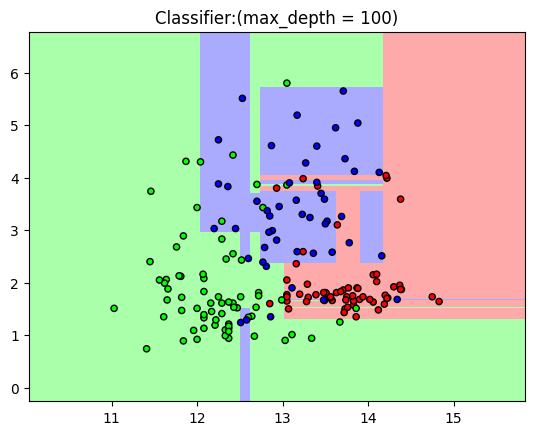

In [11]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 100)")

plt.show()

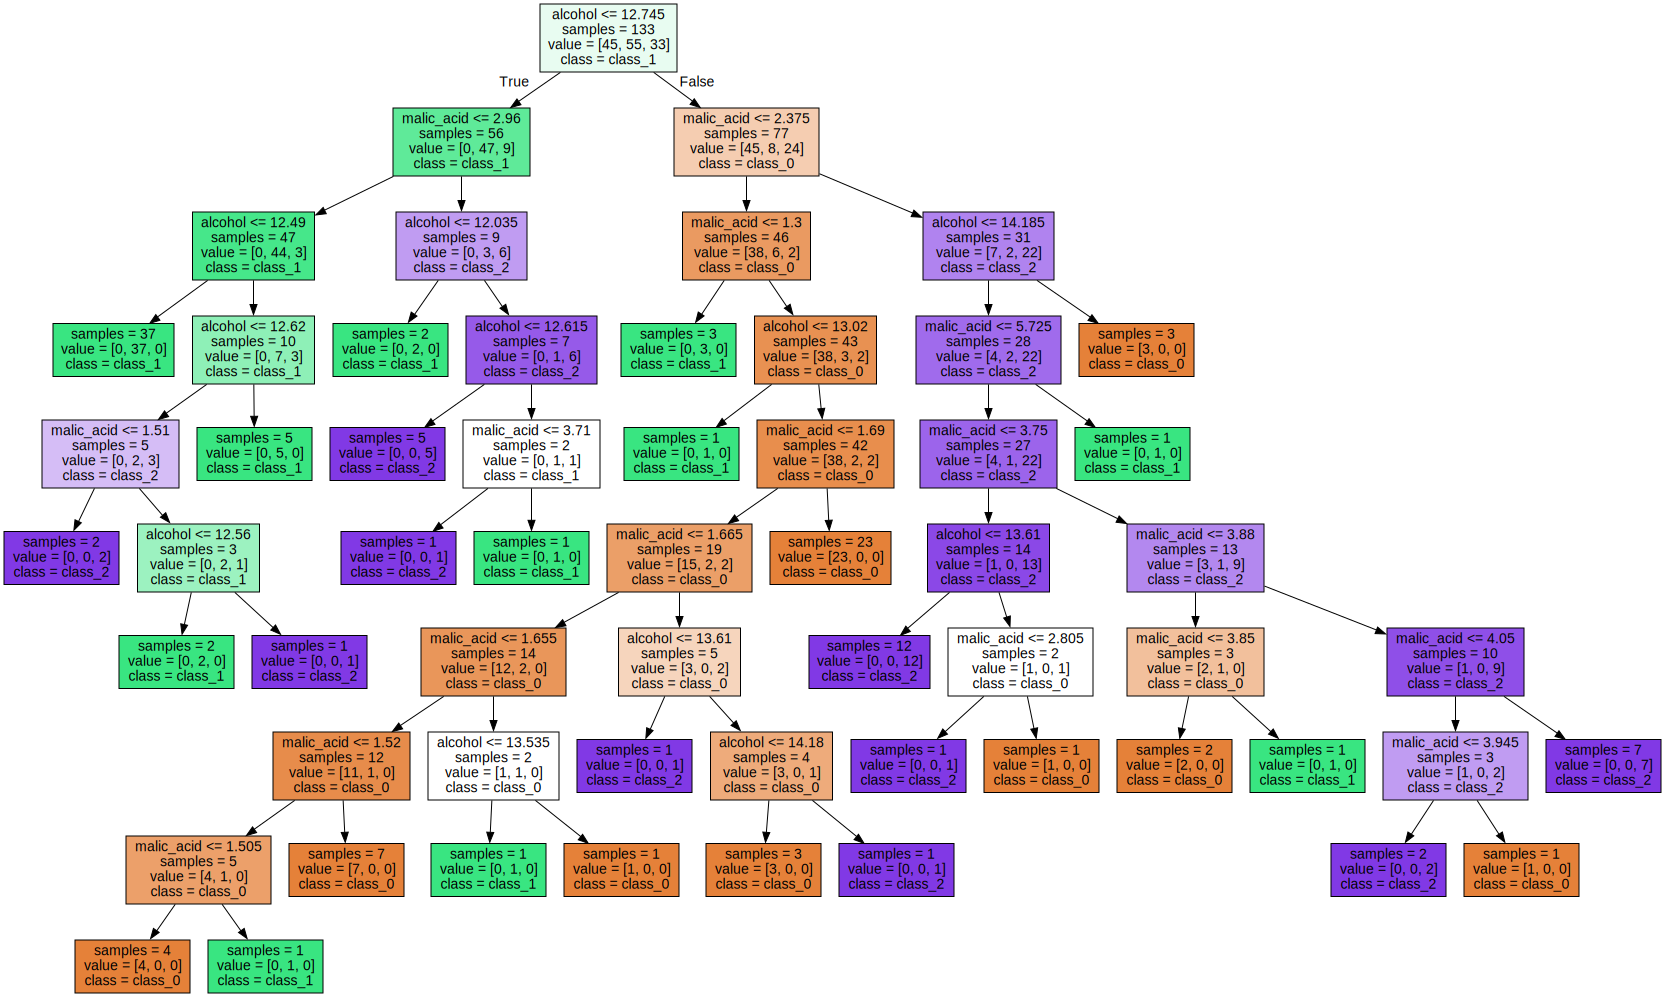

In [12]:
import graphviz
#conda install graphviz
#conda install python-graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="wine.dot", class_names=wine.target_names,
feature_names=wine.feature_names[:2], impurity=False, filled=True)
with open("wine.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


### 决策树的优势和不足
优势
- 容易将模型可视化
- 不用对数据进行转换，即几乎不需要对数据进行预处理

缺点
- 即便使用max_depth或者max_leaf_nodes进行剪枝，还是容易过拟合

使用集和学习的方法来避免过拟合——随机森林算法

## 随机森林
不要为了一棵树放弃一片森林。
### 基本概念
集合学习就是把多个机器学习算法综合到一起，制造出一个超大的模型，就是有“很多树”。应用最广泛的集合算法包括随机森林和梯度上升决策树。随机森林把几棵不同的决策树打包到一起，每棵树的参数都不相同，然后把预测结果取平均值，这样既可以保留决策树的工作成效，又可以降低过拟合的风险。
### 缺点
可解释性变弱了
对内存的需求很高。
### 随机森林的构建

In [13]:
from sklearn.ensemble import RandomForestClassifier
# 红酒数据集
wine = datasets.load_wine()
# 为了方便演示，只导入前两个特征
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y)
# 设定有6棵树
forest = RandomForestClassifier(max_features=2, n_estimators=10000, random_state=18)
# 显示决策树的参数
forest.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=10000, random_state=18)

**结果分析**: 
- bootstrap: 有放回的抽样
- max_features: 特征数量的最大值，值越高，每棵决策树就越像，值为1，随机选取一个特征向量
- n_estimators: 决策树的数量
- random_state: 随机种子选取模型。如果不希望建模结果过于动荡，则要固化这个值

In [14]:
print(forest.score(X_test, y_test))

0.7333333333333333


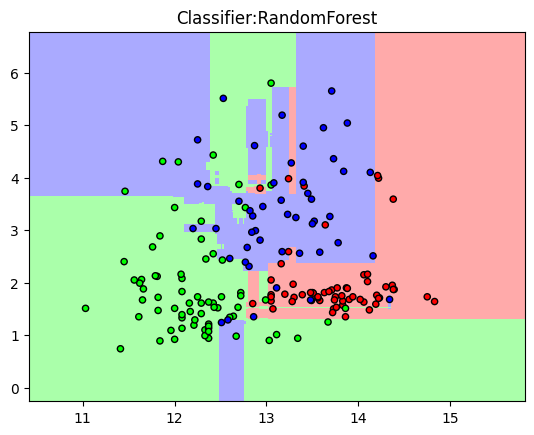

In [15]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")

plt.show()

### 优势和不足
优势
- 不用在意参数调节
- 不用预处理数据

缺点
- 不容易可视化模型工作过程
- 超大型数据比较耗时，消耗内存和CPU(n_job支持并行处理)
- 对于超高维度数据集和稀疏数据集表现一般，不如线性模型

## 随机森林实例——要不要和相亲对象进一步发展
**例**: 小Q的同事给小Q介绍了一个对象，Mr. Z。Z现年37，某省机关文员。小Q的择偶有个重要标准是年薪20万以上，但又不好直接问Z，请帮小Q做个决策，估算Z的年薪，看是否值得深入交往。

In [16]:
import pandas as pd
data = pd.read_csv('adult.csv', header=None, index_col=False,
                  names=['年龄','单位性质','权重','学历','受教育时长',
                        '婚姻状况','职业','家庭情况','种族','性别',
                        '资产所得','资产损失','周工作时长','原籍',
                        '收入'])
#为了方便展示，我们选取其中一部分数据
data_lite = data[['年龄','单位性质','学历','性别','周工作时长',
                 '职业','收入']]
#下面看一下数据的前5行是不是我们想要的结果
display(data_lite.head())

,年龄,单位性质,学历,性别,周工作时长,职业,收入
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=200K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=200K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=200K
3,53,Private,11th,Male,40,Handlers-cleaners,<=200K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=200K


In [17]:
data_dummies = pd.get_dummies(data_lite)
print('样本原始特征:\n',list(data_lite.columns),'\n')
print('虚拟变量特征:\n',list(data_dummies.columns))

样本原始特征:
 ['年龄', '单位性质', '学历', '性别', '周工作时长', '职业', '收入'] 

虚拟变量特征:
 ['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '性别_ Female', '性别_ Male', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=200K', '收入_ >200K']


In [18]:
data_dummies.head()

,年龄,周工作时长,单位性质_ ?,单位性质_ Federal-gov,单位性质_ Local-gov,单位性质_ Never-worked,单位性质_ Private,单位性质_ Self-emp-inc,单位性质_ Self-emp-not-inc,单位性质_ State-gov,...,职业_ Machine-op-inspct,职业_ Other-service,职业_ Priv-house-serv,职业_ Prof-specialty,职业_ Protective-serv,职业_ Sales,职业_ Tech-support,职业_ Transport-moving,收入_ <=200K,收入_ >200K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
features = data_dummies.loc[:,'年龄':'职业_ Transport-moving']
X = features.values
y = data_dummies['收入_ >200K'].values
print('特征形态:{} 标签形态:{}'.format(X.shape, y.shape))

特征形态:(32561, 44) 标签形态:(32561,)


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
go_dating_tree = RandomForestClassifier(max_features=10, n_estimators=1000)
go_dating_tree.fit(X_train,y_train)
print('模型得分:{:.2f}'.format(go_dating_tree.score(X_test,y_test)))

模型得分:0.79


Mr Z,年龄37，单位性质为国家机关，学历为硕士，性别男（当然了），每周工作40小时，职业是文员（Adm-clerical），现在我们用模型预测下他的收入。

['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '性别_ Female', '性别_ Male', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=200K', '收入_ >200K']

In [21]:
Mr_Z =[[47, 20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,
       0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [22]:
dating_dec = go_dating_tree.predict(Mr_Z)
if dating_dec:
    print("大胆去吧，这哥们年薪过20万了！")
else:
    print("不用去了，不满足你的要求")

不用去了，不满足你的要求
